In [34]:
from keras import models 
import keras.utils as image
import matplotlib.pyplot as plt
import numpy as np
import cv2 

In [35]:
model_name = "cifar100_2024-05-05_12:21:27.h5"

%store -r test_dir
%store -r train_dir
%store -r class_names
%store -r class_numbers

In [36]:
print(class_names)

['/beaver', '/boy', '/forest', '/oak_tree', '/snail', '/sunflower']


1/1 [==============================] - 0s 44ms/step


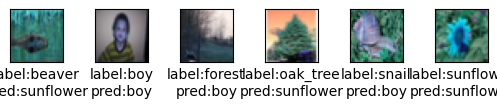

In [37]:


model=models.load_model(model_name)

for x,name in enumerate(class_names):
    tahmin_list=[]
    random=np.random.randint(1,100)
    path=(test_dir + name + '/' + str(random) + ".png")
    Giris1=image.load_img(path,
                          target_size=(32,32))

    #Numpy dizisine dönüştür
    Giris=image.img_to_array(Giris1)
    #Görüntüuü ağa uygula
    y=model.predict(Giris.reshape(1,32,32,3))
    #En yüksek tahmin sınıfını bul
    tahmin_indeks=np.argmax(y)
    tahmin_yuzde=y[0][tahmin_indeks]*100
    
    
    ax3 =plt.subplot(6,6,x+1)
    ax3.set_yticks([])
    ax3.set_xticks([])
    ax3.set_xlabel('label:{0}\npred:{1}'.format(class_names[x][1:],class_names[tahmin_indeks][1:]))
    plt.imshow(Giris1)